In [1]:
using CSV
using DataFrames

In [2]:
unfilteredData = DataFrame(CSV.File("../../Data/Dataset/processedKaggle.csv"))
times = unfilteredData[!,:datetime]

function extractDate(x)
    if x === missing
        return "nodate"
    end
    m = match(r"(?<date>\d{4}-\d{2}-\d{2}) .*",x)
    if m == nothing
        return "nodate"    
    else
        return m[:date]
    end
end
dates = map(x->extractDate(x), times)
insertcols!(unfilteredData,:datetime,:date=>dates)

10365152×7 DataFrame
      Row │ ip              request                            useragent       ⋯
          │ String15        String?                            String?         ⋯
──────────┼─────────────────────────────────────────────────────────────────────
        1 │ 54.36.149.41    GET /filter/27|13%20%D9%85%DA%AF…  Mozilla/5.0 (co ⋯
        2 │ 31.56.96.51     GET /image/60844/productModel/20…  Mozilla/5.0 (Li
        3 │ 31.56.96.51     GET /image/61474/productModel/20…  Mozilla/5.0 (Li
        4 │ 40.77.167.129   GET /image/14925/productModel/10…  Mozilla/5.0 (co
        5 │ 91.99.72.15     GET /product/31893/62100/%D8%B3%…  Mozilla/5.0 (Wi ⋯
        6 │ 40.77.167.129   GET /image/23488/productModel/15…  Mozilla/5.0 (co
        7 │ 40.77.167.129   GET /image/45437/productModel/15…  Mozilla/5.0 (co
        8 │ 40.77.167.129   GET /image/576/article/100x100 H…  Mozilla/5.0 (co
        9 │ 66.249.66.194   GET /filter/b41,b665,c150%7C%D8%…  Mozilla/5.0 (co ⋯
       10 │ 40.77.167.129   GET /image/57710/productModel/10…  Mozilla/5.0 (co
       11 │ 207.46.13.136   GET /product/10214 HTTP/1.1        Mozilla/5.0 (co
    ⋮     │       ⋮                         ⋮                                  ⋱
 10365143 │ 109.125.169.52  GET / HTTP/1.1                     Mozilla/5.0 (Wi
 10365144 │ 5.113.60.62     GET /static/images/amp/instagram…  Mozilla/5.0 (Li ⋯
 10365145 │ 5.113.60.62     GET /static/images/amp/telegram.…  Mozilla/5.0 (Li
 10365146 │ 5.113.60.62     GET /static/images/amp/blog.png …  Mozilla/5.0 (Li
 10365147 │ 5.113.60.62     GET /static/images/amp/third-par…  Mozilla/5.0 (Li
 10365148 │ 188.229.21.56   GET /content/view/shoppingRules …  Mozilla/5.0 (Li ⋯
 10365149 │ 5.127.220.71    GET /apple-touch-icon-120x120.pn…  MobileSafari/60
 10365150 │ 5.213.7.50      GET /m/product/18962/%D8%BA%D8%B…  Mozilla/5.0 (iP
 10365151 │ 109.125.169.52  GET /image/%7B%7BbasketItem.id%7…  Mozilla/5.0 (Wi
 10365152 │ 37.129.59.160   GET /basket/view HTTP/1.1          Mozilla/5.0 (Li ⋯
                                             5 columns and 10365131 rows omitted

In [3]:
function filterOut(x)
    if x === missing
        return false
    end
    if occursin(r"(/static/|/image/|/settings/logo|[.](png|jpg|css|js|ico))",x) || occursin(r"HEAD",x)
        return false
    else
        return true
    end
end

fullData = subset(unfilteredData, :request => ByRow(x->passmissing(filterOut)(x)), skipmissing=true)

2053481×7 DataFrame
     Row │ ip               request                            useragent       ⋯
         │ String15         String?                            String?         ⋯
─────────┼──────────────────────────────────────────────────────────────────────
       1 │ 54.36.149.41     GET /filter/27|13%20%D9%85%DA%AF…  Mozilla/5.0 (co ⋯
       2 │ 91.99.72.15      GET /product/31893/62100/%D8%B3%…  Mozilla/5.0 (Wi
       3 │ 66.249.66.194    GET /filter/b41,b665,c150%7C%D8%…  Mozilla/5.0 (co
       4 │ 207.46.13.136    GET /product/10214 HTTP/1.1        Mozilla/5.0 (co
       5 │ 178.253.33.51    GET /m/product/32574/62991/%D9%8…  Mozilla/5.0 (Li ⋯
       6 │ 91.99.72.15      GET /product/10075/13903/%D9%85%…  Mozilla/5.0 (X1
       7 │ 207.46.13.136    GET /product/14926 HTTP/1.1        Mozilla/5.0 (co
       8 │ 66.249.66.194    GET /m/filter/b2,p6 HTTP/1.1       Mozilla/5.0 (Li
       9 │ 91.99.72.15      GET /product/32798/63266/%DB%8C%…  Mozilla/5.0 (X1 ⋯
      10 │ 66.249.66.91     GET /filter/b874%2Cb32%2Cb63%2Cb…  Mozilla/5.0 (co
      11 │ 5.78.198.52      GET /m/product/33978/64784/%DA%A…  Mozilla/5.0 (Li
    ⋮    │        ⋮                         ⋮                                  ⋱
 2053472 │ 5.120.63.25      GET /m/browse/stove-and-oven HTT…  Mozilla/5.0 (Li
 2053473 │ 66.249.66.194    GET /search/3500/null%2Cb245 HTT…  Mozilla/5.0 (co ⋯
 2053474 │ 37.129.59.160    GET /basket/add/62424?mobile=1&a…  Mozilla/5.0 (Li
 2053475 │ 91.99.55.165     GET /m/filter/p2597%2Cb231?page=…  Mozilla/5.0 (Li
 2053476 │ 13.66.139.0      GET /product/29746/%D9%85%D8%A7%…  Mozilla/5.0 (co
 2053477 │ 45.79.177.249    GET /m/browse/evaporative-air-co…  Mozilla/5.0 (iP ⋯
 2053478 │ 109.125.169.52   GET / HTTP/1.1                     Mozilla/5.0 (Wi
 2053479 │ 188.229.21.56    GET /content/view/shoppingRules …  Mozilla/5.0 (Li
 2053480 │ 5.213.7.50       GET /m/product/18962/%D8%BA%D8%B…  Mozilla/5.0 (iP
 2053481 │ 37.129.59.160    GET /basket/view HTTP/1.1          Mozilla/5.0 (Li ⋯
                                              5 columns and 2053460 rows omitted

In [4]:
groupByIPDate = groupby(fullData,[:ip,:date])

GroupedDataFrame with 150918 groups based on keys: ip, date
First Group (37 rows): ip = "54.36.149.41", date = "2019-01-22"
 Row │ ip            request                            useragent              ⋯
     │ String15      String?                            String?                ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 54.36.149.41  GET /filter/27|13%20%D9%85%DA%AF…  Mozilla/5.0 (compatibl ⋯
   2 │ 54.36.149.41  GET /login/auth?forwardUri=%2Ffi…  Mozilla/5.0 (compatibl
   3 │ 54.36.149.41  GET /blog/cosmetic/%DA%86%DA%AF%…  Mozilla/5.0 (compatibl
   4 │ 54.36.149.41  GET /filter/5970|%D8%AA%D9%84%D8…  Mozilla/5.0 (compatibl
   5 │ 54.36.149.41  GET /filter/b192,p13010,v1|%D8%B…  Mozilla/5.0 (compatibl ⋯
   6 │ 54.36.149.41  GET /filter/b632%2Cp1%2Cb3 HTTP/…  Mozilla/5.0 (compatibl
   7 │ 54.36.149.41  GET /filter/b656,b854 HTTP/1.1     Mozilla/5.0 (compatibl
   8 │ 54.36.149.41  GET /product/34294/%D9%84%D9%BE-…  Mozilla/5.0 (compatibl
   9 │ 54.36.149.41  GET /filter/p11675,v1|%D8%B7%D9%…  Mozilla/5.0 (compatibl ⋯
  10 │ 54.36.149.41  GET /filter/6168|1366x768,b18,p3…  Mozilla/5.0 (compatibl
  11 │ 54.36.149.41  GET /filter/b903%2Cp5506%2Cstexi…  Mozilla/5.0 (compatibl
  ⋮  │      ⋮                        ⋮                                  ⋮      ⋱
  27 │ 54.36.149.41  GET /filter/p11675%2Cv1%7C%D8%AE…  Mozilla/5.0 (compatibl
  28 │ 54.36.149.41  GET /filter/331%7C1000%20%D8%AA%…  Mozilla/5.0 (compatibl ⋯
  29 │ 54.36.149.41  GET /product/20131/43687/%DA%AF%…  Mozilla/5.0 (compatibl
  30 │ 54.36.149.41  GET /filter/p26666 HTTP/1.1        Mozilla/5.0 (compatibl
  31 │ 54.36.149.41  GET /filter/b145,b215,b878,p8 HT…  Mozilla/5.0 (compatibl
  32 │ 54.36.149.41  GET /filter/p5623%2Cv1%7C%20%D9%…  Mozilla/5.0 (compatibl ⋯
  33 │ 54.36.149.41  GET /filter/b139,b653,b77,p51 HT…  Mozilla/5.0 (compatibl
  34 │ 54.36.149.41  GET /filter/p6385,v1|%20%D8%B5%D…  Mozilla/5.0 (compatibl
  35 │ 54.36.149.41  GET /product/32844/%D8%AA%D9%84%…  Mozilla/5.0 (compatibl
  36 │ 54.36.149.41  GET /filter/p5508%2Cv1%7C%D8%B2%…  Mozilla/5.0 (compatibl ⋯
  37 │ 54.36.149.41  GET /filter/p26668%2Cv1%7C%D8%B3…  Mozilla/5.0 (compatibl
                                                   5 columns and 15 rows omitted
⋮
Last Group (1 row): ip = "45.79.177.249", date = "2019-01-26"
 Row │ ip             request                            useragent             ⋯
     │ String15       String?                            String?               ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 45.79.177.249  GET /m/browse/evaporative-air-co…  Mozilla/5.0 (iPhone;  ⋯
                                                               5 columns omitted

In [5]:
weightedGraph = Dict()

for g in groupByIPDate
    firstRequest = true
    prevReq = ""
    for rec in eachrow(g)
        if firstRequest
            firstRequest = false
            continue
        end
        edge = rec[:request] => prevReq
        count = get!(weightedGraph,edge, 0)  
        weightedGraph[edge] = count+1
        prevReq = rec[:request]
    end
end

In [6]:
sortedGraph = sort(collect(weightedGraph), by=x->x[2], rev=true)

1275971-element Vector{Pair{Any, Any}}:
                                                                                                                                                                                                                                                                                                                                ("GET /site/alexaGooleAnalitic HTTP/1.1" => "GET /site/enamad HTTP/1.1") => 25272
                                                                                                                                                                                                                                                                             ("GET /amp-helper-frame.html?appId=a624a1c1-0c93-466a-a546-e146710f97e6&parentOrigin=https://www.zanbil.ir HTTP/1.1" => "") => 19178
                                                                                                                                                            

In [7]:
source = map(x ->first(first(x)), sortedGraph)
dest = map(x ->last(first(x)), sortedGraph)
weight = map(x ->last(x), sortedGraph)

graphDf = DataFrame(source=source, destination=dest, weight=weight)

1275971×3 DataFrame
     Row │ source                             destination                      ⋯
         │ String                             String                           ⋯
─────────┼──────────────────────────────────────────────────────────────────────
       1 │ GET /site/alexaGooleAnalitic HTT…  GET /site/enamad HTTP/1.1        ⋯
       2 │ GET /amp-helper-frame.html?appId…
       3 │ GET /site/alexaGooleAnalitic HTT…
       4 │ GET /site/ping HTTP/1.1            GET /site/ping HTTP/1.1
       5 │ GET / HTTP/1.1                     GET / HTTP/1.1                   ⋯
       6 │ GET /site/enamad HTTP/1.1
       7 │ POST /m/updateVariation?__amp_so…  POST /m/updateVariation?__amp_so
       8 │ GET /site/enamad HTTP/1.1          GET /site/alexaGooleAnalitic HTT
       9 │ GET /site/alexaGooleAnalitic HTT…  GET /site/alexaGooleAnalitic HTT ⋯
      10 │ GET /site/enamad HTTP/1.1          GET / HTTP/1.1
      11 │ GET /m HTTP/1.1                    GET / HTTP/1.1
    ⋮    │                 ⋮                                  ⋮                ⋱
 1275962 │ GET /product/8238?model=10313 HT…  GET /browse/iron HTTP/1.1
 1275963 │ GET /product/18820?model=38358 H…  GET /filter/b109,b135,b151,b36,b ⋯
 1275964 │ GET /filter/b168%2Cb182%2Cp2597%…  GET /filter/b105,b136,b14,b497 H
 1275965 │ GET /filter/b52%2Cp41%2Cv1%7C%D8…  GET /filter/p3%2Cv1%7C%D8%B3%D9%
 1275966 │ GET /filter/b1,b103,b105,b109,b1…  GET /filter/b143,b3,b43,p1 HTTP/
 1275967 │ GET /m/filter/979%7C1.8%20%D9%84…  GET /m/filter/b113 HTTP/1.1      ⋯
 1275968 │ GET /product/33952/64703/%DA%AF%…  GET /filter/b105%2Cb645?page=6 H
 1275969 │ GET /m/product/33896/%DB%8C%D8%A…  GET /product/30364/%D8%B9%D8%B7%
 1275970 │ GET /m/filter/b2,p3 HTTP/1.1       GET /m/filter/b103,b126,b135,b14
 1275971 │ GET /filter/b109,b135,b32,b423,b…  GET /filter/b1,b154,b742,p51 HTT ⋯
                                              2 columns and 1275950 rows omitted

In [8]:
using Plots
gr()
using DataWrangler

In [9]:
insertcols!(graphDf,:weight,:normWeights=>boxcox(graphDf[!,:weight])[:x])

1275971×4 DataFrame
     Row │ source                             destination                      ⋯
         │ String                             String                           ⋯
─────────┼──────────────────────────────────────────────────────────────────────
       1 │ GET /site/alexaGooleAnalitic HTT…  GET /site/enamad HTTP/1.1        ⋯
       2 │ GET /amp-helper-frame.html?appId…
       3 │ GET /site/alexaGooleAnalitic HTT…
       4 │ GET /site/ping HTTP/1.1            GET /site/ping HTTP/1.1
       5 │ GET / HTTP/1.1                     GET / HTTP/1.1                   ⋯
       6 │ GET /site/enamad HTTP/1.1
       7 │ POST /m/updateVariation?__amp_so…  POST /m/updateVariation?__amp_so
       8 │ GET /site/enamad HTTP/1.1          GET /site/alexaGooleAnalitic HTT
       9 │ GET /site/alexaGooleAnalitic HTT…  GET /site/alexaGooleAnalitic HTT ⋯
      10 │ GET /site/enamad HTTP/1.1          GET / HTTP/1.1
      11 │ GET /m HTTP/1.1                    GET / HTTP/1.1
    ⋮    │                 ⋮                                  ⋮                ⋱
 1275962 │ GET /product/8238?model=10313 HT…  GET /browse/iron HTTP/1.1
 1275963 │ GET /product/18820?model=38358 H…  GET /filter/b109,b135,b151,b36,b ⋯
 1275964 │ GET /filter/b168%2Cb182%2Cp2597%…  GET /filter/b105,b136,b14,b497 H
 1275965 │ GET /filter/b52%2Cp41%2Cv1%7C%D8…  GET /filter/p3%2Cv1%7C%D8%B3%D9%
 1275966 │ GET /filter/b1,b103,b105,b109,b1…  GET /filter/b143,b3,b43,p1 HTTP/
 1275967 │ GET /m/filter/979%7C1.8%20%D9%84…  GET /m/filter/b113 HTTP/1.1      ⋯
 1275968 │ GET /product/33952/64703/%DA%AF%…  GET /filter/b105%2Cb645?page=6 H
 1275969 │ GET /m/product/33896/%DB%8C%D8%A…  GET /product/30364/%D8%B9%D8%B7%
 1275970 │ GET /m/filter/b2,p3 HTTP/1.1       GET /m/filter/b103,b126,b135,b14
 1275971 │ GET /filter/b109,b135,b32,b423,b…  GET /filter/b1,b154,b742,p51 HTT ⋯
                                              3 columns and 1275950 rows omitted

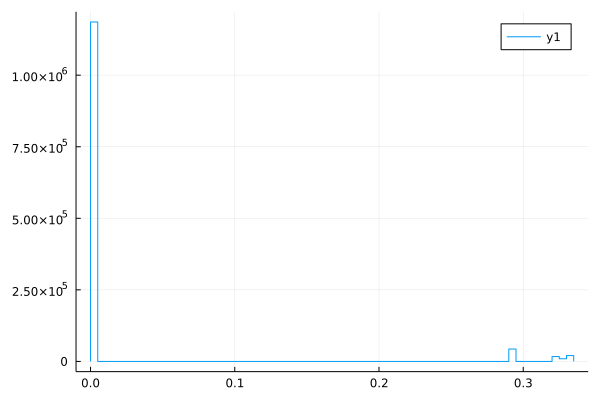

In [10]:
histogram(graphDf[!,:normWeights], bins = :scott)

In [11]:
CSV.write("../../Data/Graph/allWeightedGraph.csv", graphDf)

"../../Data/Graph/allWeightedGraph.csv"

In [12]:
count(>=(0.3), graphDf[!,:normWeights])

46859